In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import random
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/CS/Project4"
%ls 

/content/drive/MyDrive/CS/Project4
cleveland.csv  partI-kvalues.pdf  partI-trestbps.pdf  winequality-red.csv


# Part I

In [ ]:
df = pd.read_csv('cleveland.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


## k-nearest neighbors

This dataset was obtained from https://archive.ics.uci.edu/ml/datasets/Heart+Disease (this is a great resource for datasets to try machine learning on). It has data on patients that are and are not diagnosed with heart disease.

The attributes are:
* age: age in years 
* sex: sex (1 = male; 0 = female) 
* cp: chest pain type 
 * -- Value 1: typical angina 
 * -- Value 2: atypical angina 
 * -- Value 3: non-anginal pain 
 * -- Value 4: asymptomatic 
* trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
* chol: serum cholestoral in mg/dl 
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
* restecg: resting electrocardiographic results 
 * -- Value 0: normal 
 * -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
 * -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
* thalach: maximum heart rate achieved 
* exang: exercise induced angina (1 = yes; 0 = no) 
* oldpeak = ST depression induced by exercise relative to rest 
* slope: the slope of the peak exercise ST segment 
 * -- Value 1: upsloping 
 * -- Value 2: flat 
 * -- Value 3: downsloping 
* ca: number of major vessels (0-3) colored by flourosopy 
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
* num: diagnosis of heart disease (angiographic disease status) 
 * -- Value 0: absence.
 * -- Value 1,2,3,4: presence of heart disease


## Explore the data

Read in the data, modify the dependent variable name and plot a histogram of the ages of patients, both healthy and those with heart disease.

In [ ]:
# Rename 'num' column to 'disease' and change 1,2,3,4 to 1
df = df.rename({'num':'disease'}, axis=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
df['disease'] = df.disease.apply(lambda x: min(x, 1))
display(df.head(5))

print(len(df[df['disease']==1]))
print(len(df[df['disease']==0]))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


139
164


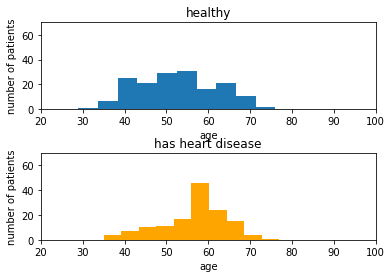

In [ ]:
# Plot histograms
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

ax1.hist(df[df.disease == 0].age);
ax1.set_xlabel('age');
ax1.set_ylabel('number of patients');
ax1.set_xlim(20, 100);
ax1.set_ylim(0, 70);
ax1.set_title('healthy');

ax2.hist(df[df.disease == 1].age, color='orange');
ax2.set_xlabel('age');
ax2.set_ylabel('number of patients');
ax2.set_xlim(20, 100);
ax2.set_ylim(0, 70);
ax2.set_title('has heart disease');
plt.savefig('partI-age.pdf')

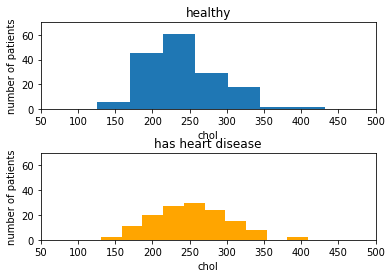

In [ ]:
# Plot histograms
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

ax1.hist(df[df.disease == 0].chol);
ax1.set_xlabel('chol');
ax1.set_ylabel('number of patients');
ax1.set_xlim(50, 500);
ax1.set_ylim(0, 70);
ax1.set_title('healthy');

ax2.hist(df[df.disease == 1].chol, color='orange');
ax2.set_xlabel('chol');
ax2.set_ylabel('number of patients');
ax2.set_xlim(50, 500);
ax2.set_ylim(0, 70);
ax2.set_title('has heart disease');
plt.savefig('partI-chol.pdf')

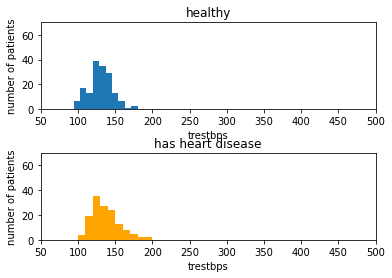

In [ ]:
# Plot histograms
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

ax1.hist(df[df.disease == 0].trestbps);
ax1.set_xlabel('trestbps');
ax1.set_ylabel('number of patients');
ax1.set_xlim(50, 500);
ax1.set_ylim(0, 70);
ax1.set_title('healthy');

ax2.hist(df[df.disease == 1].trestbps, color='orange');
ax2.set_xlabel('trestbps');
ax2.set_ylabel('number of patients');
ax2.set_xlim(50, 500);
ax2.set_ylim(0, 70);
ax2.set_title('has heart disease');

plt.savefig('partI-trestbps.pdf')

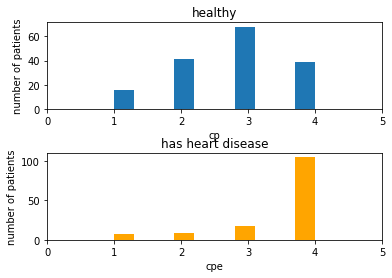

In [ ]:
# Plot histograms
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

ax1.hist(df[df.disease == 0].cp);
ax1.set_xlabel('cp');
ax1.set_ylabel('number of patients');
ax1.set_xlim(0, 5);
#ax1.set_ylim(0, 70);
ax1.set_title('healthy');

ax2.hist(df[df.disease == 1].cp, color='orange');
ax2.set_xlabel('cp');
ax2.set_ylabel('number of patients');
ax2.set_xlim(0, 5);
#ax2.set_ylim(0, 70);
ax2.set_title('has heart disease');


([<matplotlib.axis.XTick at 0x7f621125d0d0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

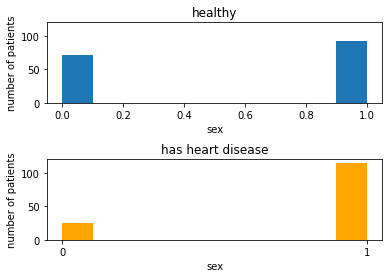

In [ ]:
# Plot histograms
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.7)

ax1.hist(df[df.disease == 0].sex);
ax1.set_xlabel('sex');
ax1.set_ylabel('number of patients');
#ax1.set_xlim(0, 1);
ax1.set_ylim(0, 120);
ax1.set_title('healthy');

ax2.hist(df[df.disease == 1].sex, color='orange');
ax2.set_xlabel('sex');
ax2.set_ylabel('number of patients');
#ax2.set_xlim(0, 1);
ax2.set_ylim(0, 120);
ax2.set_title('has heart disease');

#Used to reduce space between bars
plt.xticks([0, 1], ['0', '1'])


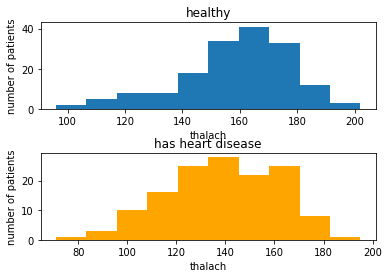

In [ ]:
# Plot histograms
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

ax1.hist((df[df.disease == 0].thalach));
ax1.set_xlabel('thalach');
ax1.set_ylabel('number of patients');
#ax1.set_xlim(0, 1);
#ax1.set_ylim(0, 70);
ax1.set_title('healthy');

ax2.hist(df[df.disease == 1].thalach, color='orange');
ax2.set_xlabel('thalach');
ax2.set_ylabel('number of patients');
#ax2.set_xlim(0, 1);
#ax2.set_ylim(0, 70);
ax2.set_title('has heart disease');
plt.savefig('partI-thalach.pdf')

In [ ]:
print('The number of people who have heart disease is',len(df[df['disease']==1]),'which is', len(df[df['disease']==1])/len(df), 'percentage of the dataset')
print('The number of people without heart disease is',len(df[df['disease']==0]),'which is',len(df[df['disease']==0])/len(df), 'percentage of the dataset')
print('Total amount of people is', len(df))

The number of people who have heart disease is 139 which is 0.45874587458745875 percentage of the dataset
The number of people without heart disease is 164 which is 0.5412541254125413 percentage of the dataset
Total amount of people is 303


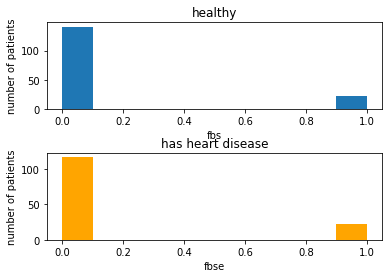

In [ ]:
# Plot histograms
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

ax1.hist((df[df.disease == 0].fbs));
ax1.set_xlabel('fbs');
ax1.set_ylabel('number of patients');
#ax1.set_xlim(0, 1);
#ax1.set_ylim(0, 70);
ax1.set_title('healthy');

ax2.hist(df[df.disease == 1].fbs, color='orange');
ax2.set_xlabel('fbs');
ax2.set_ylabel('number of patients');
#ax2.set_xlim(0, 1);
#ax2.set_ylim(0, 70);
ax2.set_title('has heart disease');


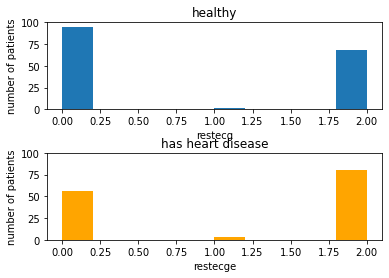

In [ ]:
# Plot histograms
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

ax1.hist((df[df.disease == 0].restecg));
ax1.set_xlabel('restecg');
ax1.set_ylabel('number of patients');
#ax1.set_xlim(0, 1);
ax1.set_ylim(0, 100);
ax1.set_title('healthy');

ax2.hist(df[df.disease == 1].restecg, color='orange');
ax2.set_xlabel('restecg');
ax2.set_ylabel('number of patients');
#ax2.set_xlim(0, 1);
ax2.set_ylim(0, 100);
ax2.set_title('has heart disease');


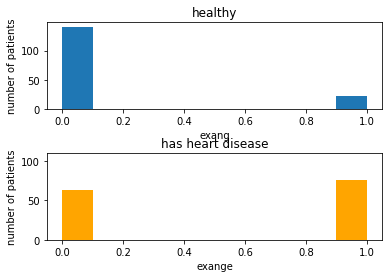

In [ ]:
# Plot histograms
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

ax1.hist((df[df.disease == 0].exang));
ax1.set_xlabel('exang');
ax1.set_ylabel('number of patients');
#ax1.set_xlim(0, 1);
#ax1.set_ylim(0, 110);
ax1.set_title('healthy');

ax2.hist(df[df.disease == 1].exang, color='orange');
ax2.set_xlabel('exang');
ax2.set_ylabel('number of patients');
#ax2.set_xlim(0, 1);
ax2.set_ylim(0, 110);
ax2.set_title('has heart disease');


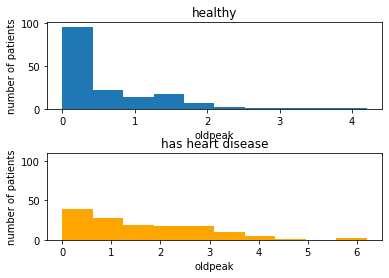

In [ ]:
# Plot histograms
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

ax1.hist((df[df.disease == 0].oldpeak));
ax1.set_xlabel('oldpeak');
ax1.set_ylabel('number of patients');
#ax1.set_xlim(0, 1);
#ax1.set_ylim(0, 110);
ax1.set_title('healthy');

ax2.hist(df[df.disease == 1].oldpeak, color='orange');
ax2.set_xlabel('oldpeak');
ax2.set_ylabel('number of patients');
#ax2.set_xlim(0, 1);
ax2.set_ylim(0, 110);
ax2.set_title('has heart disease');


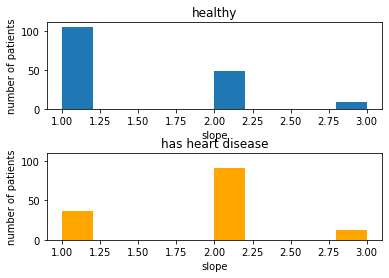

In [ ]:
# Plot histograms
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

ax1.hist((df[df.disease == 0].slope));
ax1.set_xlabel('slope');
ax1.set_ylabel('number of patients');
#ax1.set_xlim(0, 1);
#ax1.set_ylim(0, 110);
ax1.set_title('healthy');

ax2.hist(df[df.disease == 1].slope, color='orange');
ax2.set_xlabel('slope');
ax2.set_ylabel('number of patients');
#ax2.set_xlim(0, 1);
ax2.set_ylim(0, 110);
ax2.set_title('has heart disease');


In [ ]:
df=df.dropna()
df
df[~(df['ca']=='?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


In [ ]:
df['ca'] = df['ca'].str.replace('?', '',regex=True)
df=df.dropna()

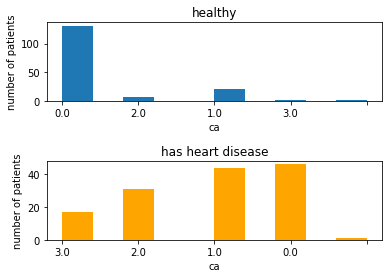

In [ ]:
# Plot histograms
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.75)

ax1.hist((df[df.disease == 0].ca));
ax1.set_xlabel('ca');
ax1.set_ylabel('number of patients');
#ax1.set_xlim(0, 1);
#ax1.set_ylim(0, 110);
ax1.set_title('healthy');

ax2.hist(df[df.disease == 1].ca, color='orange');
ax2.set_xlabel('ca');
ax2.set_ylabel('number of patients');
#ax2.set_xlim(0, 1);
#ax2.set_ylim(0, 110);
ax2.set_title('has heart disease');


## Multiple Dimensions

Data is standarized

In [ ]:
#standardized variables
#df['age_s'] = (df.age-df.age.mean())/df.age.std()
#df['chol_s'] = (df.age-df.chol.mean())/df.chol.std()
#df['trestbps_s'] = (df.age-df.trestbps_S.mean())/df.trestbps_s.std()
df['age'] = (df.age-df.age.mean())/df.age.std()
df['chol'] = (df.chol-df.chol.mean())/df.chol.std()
df['trestbps'] = (df.trestbps-df.trestbps.mean())/df.trestbps.std()
df['thalach'] = (df.thalach-df.thalach.mean())/df.thalach.std()

In [ ]:
# df[['age', 'trestbps']].values
X = df[['age', 'trestbps','chol']].values
print(X[0])
print(X[1])
X

In [ ]:
y = df[['disease']].values
y

In [ ]:
# create a nearest neighbors object.
nn = NearestNeighbors(n_neighbors=7, metric='euclidean', algorithm='auto')
print(nn)

NearestNeighbors(metric='euclidean', n_neighbors=7)


In [ ]:
# This builds an index data structure under the hood for query performance
fit = nn.fit(X)
fit

NearestNeighbors(metric='euclidean', n_neighbors=7)

In [ ]:
# Get a random patient to test on
i = random.randint(0,len(X)-1)
i

263

In [ ]:
# finding the age and trestbps for random i , for first row the i=0, second i=1 , ...
patientX = X[i]
patientX

array([-1.15492131, -0.66420094, -0.39965819])

In [ ]:
# finding whether the random i row has heart disease or not(0 or 1)
patienty = y[i]
patienty

array([0])

In [ ]:
# display all variables for rows i in data frame 
display(df.iloc[i])

age        -1.154921
sex              1.0
cp               3.0
trestbps   -0.664201
chol       -0.399658
fbs              0.0
restecg          0.0
thalach      0.84777
exang            0.0
oldpeak          0.0
slope            1.0
ca               0.0
thal             3.0
disease            0
Name: 263, dtype: object

In [ ]:
# Find the k nearest neighbors to the patient. Problem: the patient
# itself will be found in the list of neighbors!
distances, indices = fit.kneighbors([patientX])
print('distances=', distances, 'indices=', indices)

distances= [[0.         0.11588175 0.29697409 0.32925024 0.34938849 0.39593285
  0.46338588]] indices= [[263 128 134 260 186 255  99]]


In [ ]:
df.iloc[indices[0]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
263,-1.154921,1.0,3.0,-0.664201,-0.399658,0.0,0.0,0.847770,0.0,0.0,1.0,0.0,3.0,0
128,-1.154921,1.0,2.0,-0.664201,-0.515540,0.0,0.0,0.891486,0.0,0.0,1.0,0.0,3.0,0
134,-1.265557,0.0,3.0,-0.550563,-0.650735,0.0,0.0,0.672907,0.0,0.2,2.0,0.0,3.0,0
260,-1.154921,0.0,3.0,-0.777839,-0.090640,0.0,0.0,-0.026547,0.0,0.3,2.0,1.0,3.0,0
186,-1.376193,1.0,3.0,-0.664201,-0.129267,1.0,0.0,1.940666,0.0,0.8,3.0,0.0,7.0,0
255,-1.376193,0.0,3.0,-0.664201,-0.727990,0.0,0.0,1.022633,0.0,0.0,2.0,0.0,3.0,0
99,-0.712378,1.0,4.0,-0.550563,-0.476913,0.0,2.0,1.590939,0.0,0.0,1.0,0.0,3.0,0


In [ ]:
nbrs = df.iloc[indices[0]]
display(nbrs)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
263,-1.154921,1.0,3.0,-0.664201,-0.399658,0.0,0.0,0.847770,0.0,0.0,1.0,0.0,3.0,0
128,-1.154921,1.0,2.0,-0.664201,-0.515540,0.0,0.0,0.891486,0.0,0.0,1.0,0.0,3.0,0
134,-1.265557,0.0,3.0,-0.550563,-0.650735,0.0,0.0,0.672907,0.0,0.2,2.0,0.0,3.0,0
260,-1.154921,0.0,3.0,-0.777839,-0.090640,0.0,0.0,-0.026547,0.0,0.3,2.0,1.0,3.0,0
186,-1.376193,1.0,3.0,-0.664201,-0.129267,1.0,0.0,1.940666,0.0,0.8,3.0,0.0,7.0,0
255,-1.376193,0.0,3.0,-0.664201,-0.727990,0.0,0.0,1.022633,0.0,0.0,2.0,0.0,3.0,0
99,-0.712378,1.0,4.0,-0.550563,-0.476913,0.0,2.0,1.590939,0.0,0.0,1.0,0.0,3.0,0


In [ ]:
healthy = nbrs[nbrs.disease == 0].count().disease
sick = nbrs[nbrs.disease == 1].count().disease
print('healthy: {}\nsick: {}'.format(healthy, sick))

healthy: 7
sick: 0


In [ ]:
predict = 0 if (healthy > sick) else 1
actual = 0 if (patienty == 0) else 1
success = predict == actual
print(success)

True


## Performing Multiple Tests

In [ ]:
X = df[['age', 'trestbps']].values
X

In [ ]:
y = df[['disease']].values

# This builds an index data structure under the hood for query performance
fit = nn.fit(X)

In [ ]:
# Get random patients to test on

n = 7
pindices = [random.randint(0,len(X)-1) for _ in range(n)]
pindices

[126, 194, 138, 191, 34, 69, 269]

In [ ]:
#X = df[['age', 'trestbps']].values
# call row of x, x has two information, age and tresbps
patientsX = X[pindices]
patientsX

array([[ 0.17270875,  3.88131876],
       [ 1.50033882, -0.66420094],
       [-2.15064386, -0.66420094],
       [-0.38047044,  0.47217899],
       [-1.15492131, -0.09601098],
       [-0.93364964,  1.04036895],
       [-1.37619299, -0.09601098]])

In [ ]:
#patientsy contain 0 or 1, having heart dieases or not
patientsy = y[pindices]
patientsy

array([[1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0]])

In [ ]:
# Find the k nearest neighbors to the patient. Problem: we still
# have the problem of the patient itself being found!
distances, indices = fit.kneighbors(patientsX)
print('indices of k-nearest neighbors for each patient(n=7):')
display(indices)

indices of k-nearest neighbors for each patient(n=7):


array([[126, 188, 231, 183, 201, 172,  14],
       [194,   2, 245, 159,  90, 152,  71],
       [138, 283, 225, 101, 210, 211, 168],
       [191,  77, 156, 133,  56, 166,   9],
       [ 34,  53, 178, 125, 113, 148, 192],
       [ 69,  28,  47,  61, 182, 205, 207],
       [269,   4, 212, 178, 113, 192,  34]])

In [ ]:
#n=7 i=0,1,2,3,4,5,6
for i in range(n):
    print('nearest neighbors to patient: {}:'.format(patientsX[i]))
    nbrs = df.iloc[indices[i]]
    display(nbrs)

### Finding a good value of k

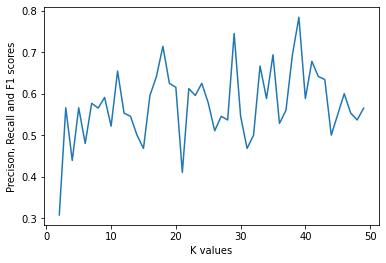

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

def get_scores(k):
  # Use knn on age. First create a nearest neighbors object.
  nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')

  # This builds an index data structure under the hood for query performance
  X = df[['age', 'trestbps','chol']].values
  fit = nn.fit(X)

  # Get random patients to test on
  n = 50
  patients = df.sample(n)
  patientsX = patients[['age','trestbps','chol']].values
  patientsy = patients[['disease']].values

  # Find the k nearest neighbors to the patient.
  distances, indices = fit.kneighbors(patientsX)

  y_pred = []
  for i in range(n):
      nbrs = df.iloc[indices[i]]
      # Drop the patient of interest
      nbrs = nbrs.drop(patients.index[i], errors='ignore')

      healthy = nbrs[nbrs.disease == 0].count().disease
      sick = nbrs[nbrs.disease == 1].count().disease
      predict = 0 if (healthy > sick) else 1
      y_pred.append(predict)
  return precision_recall_fscore_support(patientsy, y_pred, labels=[1])

kvals = range(2, 50)
scores = [get_scores(k) for k in kvals]
# print(scores)

scores = [(p[0], r[0], f[0], s[0]) for (p,r,f,s) in scores]
scores = list(zip(*scores))

plt.plot(kvals, scores[2])
plt.ylabel('Precison, Recall and F1 scores')
plt.xlabel('K values')
plt.savefig('partI-kvalues.pdf')

## Split data into train/test and get precision/recall/f score by cross validation

In [ ]:
#standardized variables
df['age'] = (df.age-df.age.mean())/df.age.std()
df['chol'] = (df.chol-df.chol.mean())/df.chol.std()
df['trestbps'] = (df.trestbps-df.trestbps.mean())/df.trestbps.std()

df['thalach'] = (df.thalach-df.thalach.mean())/df.thalach.std()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

k = 23
nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')

X = df[['age', 'trestbps', 'thalach', 'chol']].values
y = df[['disease']].values

precision = []
recall = []
f1 = []
support = []

for _ in range(20):
    # Use random_state if you want the same values each time you run for debugging,
    # but you should select the split randomly when you're ready to actually train
    # and test on the data.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

    # This builds an index data structure under the hood for query performance
    fit = nn.fit(X_train)

    # Find the k nearest neighbors to the patient.
    distances, indices = fit.kneighbors(X_test)

    y_pred = []
    for i in range(len(X_test)):
        positive = y_test[i][0]
        nbr_values = y_train[indices[i]]
        y_pred.append(0 if sum(nbr_values[:,0]) < k/2 else 1)

    (p,r,f,s) = precision_recall_fscore_support(y_test, y_pred)

    print(p[0],r[0],f[0],s[0])
    precision.append(p[0])
    recall.append(r[0])
    f1.append(f[0])
    support.append(s[0])

print('mean of f1 scores=',sum(f1)/len(f1))

0.723404255319149 0.8095238095238095 0.7640449438202246 42
0.6595744680851063 0.7045454545454546 0.6813186813186813 44
0.6341463414634146 0.6341463414634146 0.6341463414634146 41
0.6904761904761905 0.6590909090909091 0.6744186046511628 44
0.6041666666666666 0.6904761904761905 0.6444444444444444 42
0.6415094339622641 0.7906976744186046 0.7083333333333334 43
0.6764705882352942 0.5609756097560976 0.6133333333333334 41
0.673469387755102 0.7674418604651163 0.7173913043478259 43
0.6829268292682927 0.717948717948718 0.7000000000000001 39
0.7368421052631579 0.6666666666666666 0.7 42
0.6666666666666666 0.7804878048780488 0.7191011235955055 41
0.6595744680851063 0.8378378378378378 0.7380952380952381 37
0.6666666666666666 0.6842105263157895 0.6753246753246753 38
0.6842105263157895 0.65 0.6666666666666667 40
0.6818181818181818 0.75 0.7142857142857143 40
0.6470588235294118 0.6285714285714286 0.6376811594202899 35
0.7555555555555555 0.7906976744186046 0.7727272727272727 43
0.6444444444444445 0.76315

# Part II

In [ ]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df['quality'] = (df['quality'] > 5).astype(int)
display(df.head(10))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [ ]:
print('quality level of 6 7 8 =',len(df[df['quality']==1]))
print('quality level of 1 2 3 4 5 =',len(df[df['quality']==0]))

Explore the data

In [ ]:
#Rename  column 

df = df.rename({'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, axis=1)
df.head()

In [ ]:
# Plot histograms for PH
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.7)

ax1.hist(df[df.quality == 0].pH);
ax1.set_xlabel('pH');
ax1.set_ylabel('number of wine');
#ax1.set_xlim(20, 80);
#ax1.set_ylim(0, 50);
ax1.set_title('bad wine');

ax2.hist(df[df.quality == 1].pH, color='orange');
ax2.set_xlabel('pH');
ax2.set_ylabel('nnumber of wine');
#ax2.set_xlim(20, 80);
#ax2.set_ylim(0, 50);
ax2.set_title('good wine');
plt.savefig('partII-pH.pdf')

In [ ]:
# Plot histograms for alcohol
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.7)

ax1.hist(df[df.quality == 0].alcohol);
ax1.set_xlabel('alcohol');
ax1.set_ylabel('number of wine');
#ax1.set_xlim(20, 80);
#ax1.set_ylim(0, 50);
ax1.set_title('bad wine');

ax2.hist(df[df.quality == 1].alcohol, color='orange');
ax2.set_xlabel('alcohol');
ax2.set_ylabel('nnumber of wine');
#ax2.set_xlim(20, 80);
#ax2.set_ylim(0, 50);
ax2.set_title('good wine');
plt.savefig('partII-alcohol.pdf')

In [ ]:
# Plot histograms for chlorides
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.7)

ax1.hist(df[df.quality == 0].chlorides);
ax1.set_xlabel('chlorides');
ax1.set_ylabel('number of wine');
#ax1.set_xlim(20, 80);
#ax1.set_ylim(0, 50);
ax1.set_title('bad wine');

ax2.hist(df[df.quality == 1].chlorides, color='orange');
ax2.set_xlabel('chlorides');
ax2.set_ylabel('nnumber of wine');
#ax2.set_xlim(20, 80);
#ax2.set_ylim(0, 50);
ax2.set_title('good wine');

In [ ]:
# Plot histograms for residual_sugar
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.7)

ax1.hist(df[df.quality == 0].residual_sugar);
ax1.set_xlabel('residual_sugar');
ax1.set_ylabel('number of wine');
#ax1.set_xlim(20, 80);
#ax1.set_ylim(0, 50);
ax1.set_title('bad wine');

ax2.hist(df[df.quality == 1].residual_sugar, color='orange');
ax2.set_xlabel('residual_sugar');
ax2.set_ylabel('nnumber of wine');
#ax2.set_xlim(20, 80);
#ax2.set_ylim(0, 50);
ax2.set_title('good wine');
plt.savefig('partII-residual-sugar.pdf')

In [ ]:
#Plot histograms for citric_acid
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.7)

ax1.hist(df[df.quality == 0].citric_acid);
ax1.set_xlabel('citric_acid');
ax1.set_ylabel('number of wine');
#ax1.set_xlim(20, 80);
#ax1.set_ylim(0, 50);
ax1.set_title('bad wine');

ax2.hist(df[df.quality == 1].citric_acid, color='orange');
ax2.set_xlabel('citric_acid');
ax2.set_ylabel('nnumber of wine');
#ax2.set_xlim(20, 80);
#ax2.set_ylim(0, 50);
ax2.set_title('good wine');

In [ ]:
#Plot histograms for citric_acid
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.7)

ax1.hist(df[df.quality == 0].citric_acid);
ax1.set_xlabel('citric_acid');
ax1.set_ylabel('number of wine');
#ax1.set_xlim(20, 80);
#ax1.set_ylim(0, 50);
ax1.set_title('bad wine');

ax2.hist(df[df.quality == 1].citric_acid, color='orange');
ax2.set_xlabel('citric_acid');
ax2.set_ylabel('nnumber of wine');
#ax2.set_xlim(20, 80);
#ax2.set_ylim(0, 50);
ax2.set_title('good wine');

In [ ]:
#Plot histograms for volatile_acidity
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.7)

ax1.hist(df[df.quality == 0].volatile_acidity);
ax1.set_xlabel('volatile_acidity');
ax1.set_ylabel('number of wine');
#ax1.set_xlim(20, 80);
#ax1.set_ylim(0, 50);
ax1.set_title('bad wine');

ax2.hist(df[df.quality == 1].volatile_acidity, color='orange');
ax2.set_xlabel('volatile_acidity');
ax2.set_ylabel('nnumber of wine');
#ax2.set_xlim(20, 80);
#ax2.set_ylim(0, 50);
ax2.set_title('good wine');

In [ ]:
#Plot histograms for volatile_acidity
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.7)

ax1.hist(df[df.quality == 0].volatile_acidity);
ax1.set_xlabel('volatile_acidity');
ax1.set_ylabel('number of wine');
#ax1.set_xlim(20, 80);
#ax1.set_ylim(0, 50);
ax1.set_title('bad wine');

ax2.hist(df[df.quality == 1].volatile_acidity, color='orange');
ax2.set_xlabel('volatile_acidity');
ax2.set_ylabel('nnumber of wine');
#ax2.set_xlim(20, 80);
#ax2.set_ylim(0, 50);
ax2.set_title('good wine');

In [ ]:
#Plot histograms for density
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.7)

ax1.hist(df[df.quality == 0].density);
ax1.set_xlabel('density');
ax1.set_ylabel('number of wine');
#ax1.set_xlim(20, 80);
#ax1.set_ylim(0, 50);
ax1.set_title('bad wine');

ax2.hist(df[df.quality == 1].density, color='orange');
ax2.set_xlabel('density');
ax2.set_ylabel('nnumber of wine');
#ax2.set_xlim(20, 80);
#ax2.set_ylim(0, 50);
ax2.set_title('good wine');

## standarized data

In [ ]:
df['pH'] = (df.pH-df.pH.mean())/df.pH.std()
df['alcohol'] = (df.alcohol-df.alcohol.mean())/df.alcohol.std()
df['residual_sugar'] = (df.residual_sugar-df.residual_sugar.mean())/df.residual_sugar.std()

## Finding a good value of k

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

def get_scores(k):
  # Use knn on age. First create a nearest neighbors object.
  nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')

  # This builds an index data structure under the hood for query performance
  X = df[['pH', 'alcohol','residual_sugar']].values
  fit = nn.fit(X)

  # Get random patients to test on
  n = 50
  wines = df.sample(n)
  winesX = wines[['pH', 'alcohol','residual_sugar']].values
  winesy = wines[['quality']].values

  # Find the k nearest neighbors to the patient.
  distances, indices = fit.kneighbors(winesX)

  y_pred = []
  for i in range(n):
      nbrs = df.iloc[indices[i]]
      # Drop the patient of interest
      nbrs = nbrs.drop(wines.index[i], errors='ignore')

      bad = nbrs[nbrs.quality == 0].count().quality
      good = nbrs[nbrs.quality == 1].count().quality
      predict = 0 if (good < bad) else 1
      y_pred.append(predict)
  return precision_recall_fscore_support(winesy, y_pred, labels=[1])

kvals = range(2, 50)
scores = [get_scores(k) for k in kvals]
# print(scores)

scores = [(p[0], r[0], f[0], s[0]) for (p,r,f,s) in scores]
scores = list(zip(*scores))

plt.plot(kvals, scores[2])
plt.ylabel('Precison, Recall and F1 scores')
plt.xlabel('K values')
plt.savefig('partII-kvalues.pdf')

Split data into train/test and get precision/recall/f score by cross validation, 10 iteration

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

k = 25
nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')

X = df[['pH', 'alcohol','residual_sugar']].values
y = df[['quality']].values

precision = []
recall = []
f1 = []
support = []

for _ in range(10):
    # Use random_state if you want the same values each time you run for debugging,
    # but you should select the split randomly when you're ready to actually train
    # and test on the data.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

    # This builds an index data structure under the hood for query performance
    fit = nn.fit(X_train)

    # Find the k nearest neighbors to the patient.
    distances, indices = fit.kneighbors(X_test)

    y_pred = []
    for i in range(len(X_test)):
        positive = y_test[i][0]
        nbr_values = y_train[indices[i]]
        y_pred.append(0 if sum(nbr_values[:,0]) < k/2 else 1)

    (p,r,f,s) = precision_recall_fscore_support(y_test, y_pred)

    print(p[0],r[0],f[0],s[0])
    precision.append(p[0])
    recall.append(r[0])
    f1.append(f[0])
    support.append(s[0])

print('mean of f1 scores=',sum(f1)/len(f1))